#### 1.2 Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv('modified_c4_epa_air_quality.csv', index_col = 0)

#### 1.3 Data Exploration

In [4]:
data.head(10)

,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
date_local,,,,,,,
2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759


In [8]:
# Display no of rows and columns
data.shape

(260, 7)

Text(0.5, 0, 'Aqi Value')

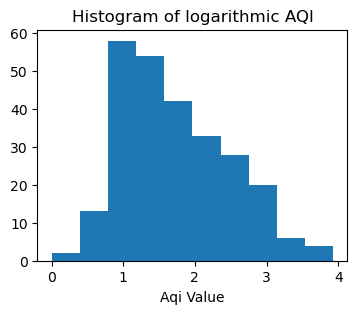

In [10]:
# Create a histogram of aqi column
plt.figure(figsize=(4,3))
plt.hist(data['aqi_log'])
plt.title('Histogram of logarithmic AQI')
plt.xlabel('Aqi Value')

#### 1.4 Statistical Tests

In [13]:
# Define variable for aqi_log mean
aqi_mean = data['aqi_log'].mean()
print(aqi_mean)

1.7669210929985582


In [15]:
# Define variable for aqi_log standard deviation
aqi_std = data['aqi_log'].std()
print(aqi_std)

0.7147155520223721


In [17]:
# Define variables for upper limit and lower limit, 1 std above and below the mean
upper_limit1 = aqi_mean + 1*aqi_std
lower_limit1 = aqi_mean - 1*aqi_std
print('upper limit and lower limit are: ',upper_limit1,'and',lower_limit1)

upper limit and lower limit are:  2.4816366450209304 and 1.052205540976186


In [19]:
# Display the actual percentage of data that falls between 1 std of the mean
std1 = (((data['aqi_log'] >= lower_limit1) & (data['aqi_log'] <= upper_limit1)).mean()) * 100 
print('The percentile that falls within 1 standard deviation is :', std1 , '%')

The percentile that falls within 1 standard deviation is : 76.15384615384615 %


In [21]:
# Define variables for upper limit and lower limit, 2 std above and below the mean
upper_limit2 = aqi_mean + 2*aqi_std
lower_limit2 = aqi_mean - 2*aqi_std
print('upper limit and lower limit of 2 std are: ',upper_limit2,'and',lower_limit2)

upper limit and lower limit of 2 std are:  3.1963521970433026 and 0.3374899889538139


In [23]:
# Display the actual percentage of data that falls between 2 std of the mean
std2 = (((data['aqi_log'] >= lower_limit2) & (data['aqi_log'] <= upper_limit2)).mean()) * 100 
print('The percentile that falls within 2 standard deviation is :', std2 , '%')

The percentile that falls within 2 standard deviation is : 95.76923076923077 %


In [25]:
# Define variables for upper limit and lower limit, 3 std above and below the mean
upper_limit3 = aqi_mean + 3*aqi_std
lower_limit3 = aqi_mean - 3*aqi_std
print('upper limit and lower limit of 3 std are: ',upper_limit3,'and',lower_limit3)

upper limit and lower limit of 3 std are:  3.9110677490656744 and -0.37722556306855815


In [27]:
# Display the actual percentage of data that falls between 3 std of the mean
std3 = (((data['aqi_log'] >= lower_limit3) & (data['aqi_log'] <= upper_limit3)).mean()) * 100 
print('The percentile that falls within 3 standard deviation is :', std3 , '%')

The percentile that falls within 3 standard deviation is : 99.61538461538461 %


#### 1.5 Results and Evaluation

In [30]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.
z_score = stats.zscore(data['aqi_log'])
z_score

date_local
2018-01-01    0.438109
2018-01-01    0.034820
2018-01-01   -0.936873
2018-01-01   -0.533584
2018-01-01   -0.533584
                ...   
2018-01-01   -0.533584
2018-01-01   -0.936873
2018-01-01   -0.936873
2018-01-01    0.750924
2018-01-01   -0.936873
Name: aqi_log, Length: 260, dtype: float64

In [32]:
data['z_score'] = z_score
data.head(10)

,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
date_local,,,,,,,,
2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.438109
2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034820
2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.936873
2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.533584
2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.533584
2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050,1.319328
2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612,-0.936873
2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612,-0.936873
2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759,0.034820


In [34]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean
data[(data['z_score'] > 3) | (data['z_score'] < -3)]

,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
date_local,,,,,,,,
2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.034886


Text(0.5, 1.0, 'Plot of z score')

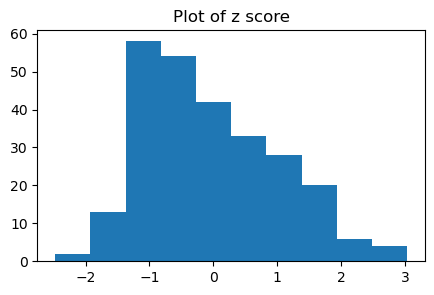

In [45]:
plt.figure(figsize = (5,3))
plt.hist(data['z_score'])
plt.title('Plot of z score')